In [42]:
#importing necessary libraries

import json
import pandas as pd
import numpy as np
import collections, re

#NLP libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

#for visualization
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


# Importing English SMS Data 

In [2]:
with open('English.json') as f:
    data = json.load(f)


In [3]:
type(data)

dict

In [4]:
listofDict = data['smsCorpus']['message']

In [5]:
len(listofDict)

55835

In [6]:
listofDict[0]

{'@id': 10120,
 'collectionMethod': {'@collector': 'howyijue',
  '@method': 'unknown',
  '@time': '2003/4'},
 'destination': {'@country': 'unknown', 'destNumber': {'$': 'unknown'}},
 'messageProfile': {'@language': 'en', '@time': 'unknown', '@type': 'unknown'},
 'source': {'phoneModel': {'@manufactuer': 'unknown',
   '@smartphone': 'unknown'},
  'srcNumber': {'$': 51},
  'userProfile': {'age': {'$': 'unknown'},
   'city': {'$': 'unknown'},
   'country': {'$': 'SG'},
   'experience': {'$': 'unknown'},
   'frequency': {'$': 'unknown'},
   'gender': {'$': 'unknown'},
   'inputMethod': {'$': 'unknown'},
   'nativeSpeaker': {'$': 'unknown'},
   'userID': {'$': 51}}},
 'text': {'$': 'Bugis oso near wat...'}}

In [7]:
fullData = pd.DataFrame(listofDict)

Extracting text messages

In [8]:
smsData = fullData[['@id','text']]

In [9]:
smsData = pd.DataFrame(smsData)
smsData.head()

,@id,text
0,10120,{'$': 'Bugis oso near wat...'}
1,10121,"{'$': 'Go until jurong point, crazy.. Availabl..."
2,10122,{'$': 'I dunno until when... Lets go learn pil...
3,10123,{'$': 'Den only weekdays got special price... ...
4,10124,{'$': 'Meet after lunch la...'}


# Word Count

Count of words in each text message

In [10]:
smsData['word_count'] = smsData['text'].apply(lambda x: len(str(x).split(" ")))
smsData[['text','word_count']].head()
smsData.head()

,@id,text,word_count
0,10120,{'$': 'Bugis oso near wat...'},5
1,10121,"{'$': 'Go until jurong point, crazy.. Availabl...",21
2,10122,{'$': 'I dunno until when... Lets go learn pil...,9
3,10123,{'$': 'Den only weekdays got special price... ...,26
4,10124,{'$': 'Meet after lunch la...'},5


average word count

In [11]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

smsData['avg_word'] = smsData['text'].apply(lambda x: avg_word(str(x)))
smsData[['text','avg_word']].head()


,text,avg_word
0,{'$': 'Bugis oso near wat...'},5.200000
1,"{'$': 'Go until jurong point, crazy.. Availabl...",4.761905
2,{'$': 'I dunno until when... Lets go learn pil...,5.222222
3,{'$': 'Den only weekdays got special price... ...,4.769231
4,{'$': 'Meet after lunch la...'},5.400000


Number of stopwords

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

smsData['stopwords'] = smsData['text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
smsData[['text','stopwords']].head()

,text,stopwords
0,{'$': 'Bugis oso near wat...'},0
1,"{'$': 'Go until jurong point, crazy.. Availabl...",4
2,{'$': 'I dunno until when... Lets go learn pil...,1
3,{'$': 'Den only weekdays got special price... ...,3
4,{'$': 'Meet after lunch la...'},1


# Pre Processing SMS text

# Converting text messages to lowercase

In [13]:
smsData['text'] = smsData['text'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
smsData['text'].head()

0                       {'$': 'bugis oso near wat...'}
1    {'$': 'go until jurong point, crazy.. availabl...
2    {'$': 'i dunno until when... lets go learn pil...
3    {'$': 'den only weekdays got special price... ...
4                      {'$': 'meet after lunch la...'}
Name: text, dtype: object

In [14]:
smsData['upper'] = smsData['text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
smsData[['text','upper']].head()

,text,upper
0,{'$': 'bugis oso near wat...'},0
1,"{'$': 'go until jurong point, crazy.. availabl...",0
2,{'$': 'i dunno until when... lets go learn pil...,0
3,{'$': 'den only weekdays got special price... ...,0
4,{'$': 'meet after lunch la...'},0


# Removing Punctuations

In [15]:
smsData['text'] = smsData['text'].str.replace('[^\w\s]','')
smsData['text'].head()

0                                   bugis oso near wat
1     go until jurong point crazy available only in...
2             i dunno until when lets go learn pilates
3     den only weekdays got special price haiz cant...
4                                  meet after lunch la
Name: text, dtype: object

# Removing Stopwords

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
smsData['text'].head()

0                                   bugis oso near wat
1    go jurong point crazy available bugis n great ...
2                          dunno lets go learn pilates
3    den weekdays got special price haiz cant eat l...
4                                        meet lunch la
Name: text, dtype: object

# Removing common words

In [17]:
freq = pd.Series(' '.join(smsData['text']).split()).value_counts()[:10]
freq

u       10697
haha     6604
go       3564
lol      3098
ok       2783
got      2661
im       2445
time     2136
okay     2024
ur       1844
dtype: int64

In [18]:
freq = list(freq.index)
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
smsData['text'].head()

0                                   bugis oso near wat
1    jurong point crazy available bugis n great wor...
2                             dunno lets learn pilates
3    den weekdays special price haiz cant eat liao ...
4                                        meet lunch la
Name: text, dtype: object

# Removing rare words

In [19]:
rare = pd.Series(' '.join(smsData['text']).split()).value_counts()[-10:]
rare

46pm                      1
eventhough                1
seeseewalkwalktalktalk    1
aafter                    1
taint                     1
maraling                  1
liners                    1
dzee                      1
money_                    1
12at                      1
dtype: int64

In [20]:
rare = list(rare.index)
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
smsData['text'].head()

0                                   bugis oso near wat
1    jurong point crazy available bugis n great wor...
2                             dunno lets learn pilates
3    den weekdays special price haiz cant eat liao ...
4                                        meet lunch la
Name: text, dtype: object

# Spell Check using TextBlob

Corrects the spelling of words with the most matched words

In [21]:
from textblob import TextBlob
smsData['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    boris so near wat
1    during point crazy available boris n great wor...
2                              funny lets learn plates
3    den weekdays special price hair can eat liar c...
4                                        meet lunch la
Name: text, dtype: object

# Stemming
Strips affixes using Porter's stemming algorith to reduce inflections or variant forms 

In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
smsData['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in str(x).split()]))

0                                    bugi oso near wat
1    jurong point crazi avail bugi n great world la...
2                                dunno let learn pilat
3    den weekday special price haiz cant eat liao c...
4                                        meet lunch la
Name: text, dtype: object

# Lemmatization
Replaces with the corrects dictionary base form of a word

In [23]:
from textblob import Word
smsData['text'] = smsData['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
smsData['text'].head()

0                                   bugis oso near wat
1    jurong point crazy available bugis n great wor...
2                               dunno let learn pilate
3    den weekday special price haiz cant eat liao c...
4                                        meet lunch la
Name: text, dtype: object

# Extracting Bigrams

In [24]:
TextBlob(smsData['text'][3]).ngrams(2)

[WordList(['den', 'weekday']),
 WordList(['weekday', 'special']),
 WordList(['special', 'price']),
 WordList(['price', 'haiz']),
 WordList(['haiz', 'cant']),
 WordList(['cant', 'eat']),
 WordList(['eat', 'liao']),
 WordList(['liao', 'cut']),
 WordList(['cut', 'nail']),
 WordList(['nail', 'oso']),
 WordList(['oso', 'muz']),
 WordList(['muz', 'wait']),
 WordList(['wait', 'finish']),
 WordList(['finish', 'drivin']),
 WordList(['drivin', 'wat']),
 WordList(['wat', 'lunch']),
 WordList(['lunch', 'still']),
 WordList(['still', 'muz']),
 WordList(['muz', 'eat']),
 WordList(['eat', 'wat'])]

Term Frequency

In [25]:
tf1 = (smsData['text'][1:2]).apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,world,1
1,crazy,1
2,great,1
3,bugis,1
4,la,1
5,n,1
6,e,1
7,point,1
8,buffet,1
9,cine,1


Inverse Document Frequency

In [26]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(smsData.shape[0]/(len(smsData[smsData['text'].str.contains(word)])))

tf1.sort_values(by=['idf'],ascending=False)

,words,tf,idf
10,amore,1,8.850715
11,jurong,1,7.266595
8,buffet,1,6.959864
12,available,1,6.941172
3,bugis,1,6.710648
9,cine,1,6.548130
1,crazy,1,6.464248
0,world,1,6.202768
7,point,1,5.578298
2,great,1,5.168105


# Term Frequency-Inverse Document Frequency

* Measure of availabilty of a word within a text message as well as the scarcity of the word over the entire collection of text messages 
* More the Tf-Idf more important the word is.

In [27]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values(by=['idf'],ascending=False)

,words,tf,idf,tfidf
10,amore,1,8.850715,8.850715
11,jurong,1,7.266595,7.266595
8,buffet,1,6.959864,6.959864
12,available,1,6.941172,6.941172
3,bugis,1,6.710648,6.710648
9,cine,1,6.548130,6.548130
1,crazy,1,6.464248,6.464248
0,world,1,6.202768,6.202768
7,point,1,5.578298,5.578298
2,great,1,5.168105,5.168105


# Barplot of Term Frequency Inverse Document Frequency against words 

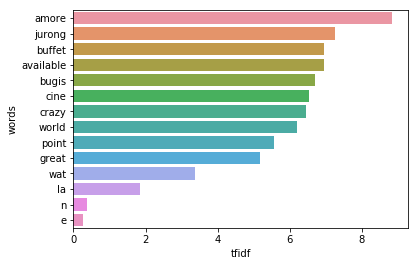

In [28]:
topvacab = tf1.sort_values(by='tfidf',ascending=False)
top_vacab = topvacab.head(20)
sns.barplot(x='tfidf',y='words', data=top_vacab)

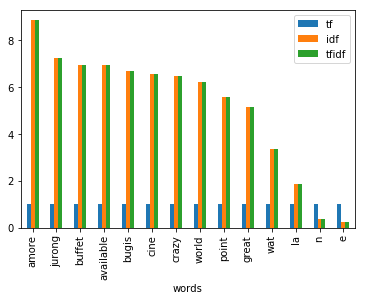

In [29]:
top_vacab.plot(x ='words', kind='bar') 

# Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
BagOfWords = bow.fit_transform(smsData['text'])
BagOfWords

<55835x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 206054 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
Classifies texts based on the sentiment they represent .

In [31]:
smsData['sentiment'] = smsData['text'].apply(lambda x: TextBlob(str(x)).sentiment[0] )
sentiment = smsData[['text','sentiment']]

sentiment.head()

,text,sentiment
0,bugis oso near wat,0.100000
1,jurong point crazy available bugis n great wor...,0.200000
2,dunno let learn pilate,0.000000
3,den weekday special price haiz cant eat liao c...,0.357143
4,meet lunch la,0.000000


In [43]:
pos_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] > 0]
neu_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] == 0]
neg_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] < 0]

possitive_percent = len(pos_texts)*100/len(smsData['text'])
neutral_percent = len(neu_texts)*100/len(smsData['text'])
negative_percent = len(neg_texts)*100/len(smsData['text'])

# Pie chart of Sentiment Analysis 

([<matplotlib.patches.Wedge at 0x1a84c69d240>,
 [Text(0.789016,0.766456,'Possitive'),
  Text(-1.02051,-0.410559,'Neutral'),
  Text(1.01807,-0.416581,'Negative')],
 [Text(0.430372,0.418067,'24.538'),
  Text(-0.556642,-0.223941,'63.098'),
  Text(0.555309,-0.227226,'12.363')])

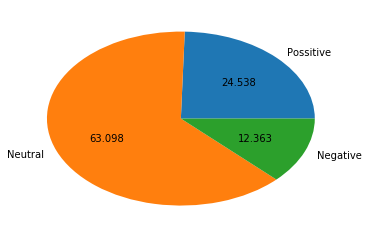

In [33]:
percent_values = [possitive_percent, neutral_percent, negative_percent]
labels = 'Possitive', 'Neutral', 'Negative'

plt.pie(percent_values, labels=labels, autopct='%3.3f')

# Creating Word Cloud

# Word Cloud of possitive texts


(-0.5, 999.5, 499.5, -0.5)

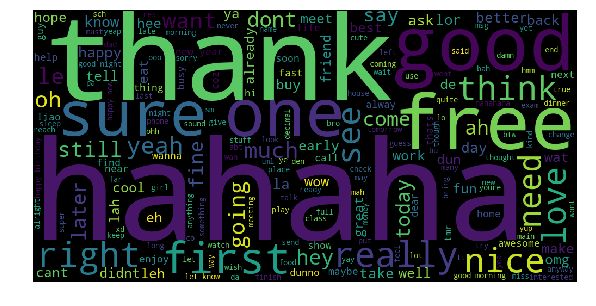

In [34]:
k= (' '.join(pos_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Wordcloud of neutral texts

(-0.5, 999.5, 499.5, -0.5)

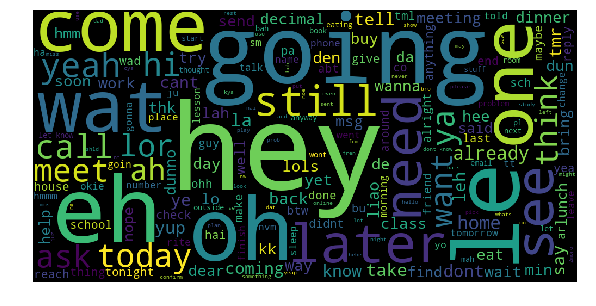

In [37]:
k= (' '.join(neu_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Word Cloud of Negative texts

(-0.5, 999.5, 499.5, -0.5)

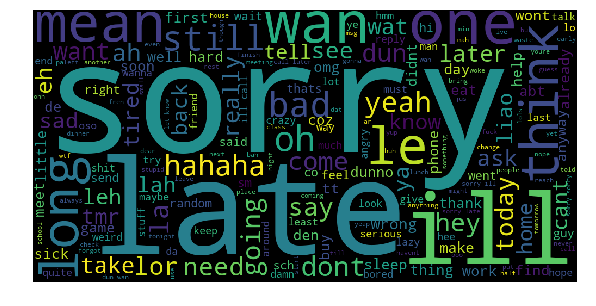

In [39]:
k= (' '.join(neg_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')